In [ ]:
import math
import statistics
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Day 03 - MATH/PHYS 241

Last time we looked at how our data can be visually inspected to verify how well it matches a normal distribution. While visually impactful, we would benefit from including a quantatative test as well.



# The Null Hypothesis and Hypothesis Testing

One of the main concepts you learn by studying statistics is that we cannot actually *prove* anything, but we can *disprove* something. So, while we cannot prove that a group of samples is a match to a normal distribution, we can disprove the samples do match a normal distribution.

The easiest method of doing this is via the **null hypothesis**, $H_0$, which states *there is no difference*. Accompanying the null hypothesis is the **alternative hypothesis**, $H_1$, which states *there is a difference*:

$$
\begin{align}
H_0 &: \mu_0 = \mu_1 \tag{1} \\
H_1 &: \mu_0 \neq \mu_1 \tag{2}
\end{align}
$$

Keep in mind these two statements are mutually exclusive and all inclusive. This means all possibilities are covered by the statements and that if one is false, the other is true. They cannot both be true statements.

Also, we should mention that the alternative hypothesis can be written using greater than ($>$), less than ($<$), or not equal signs. Which one you should use will depend on the specific case. For many cases (espeically normally distributed ones), the two-tailed test is appropriate since we are interested in comparing against "extreme events" in either direction of the mean.

To apply the null hypothesis, we need to decide on a significance level (typically symbolized as $\alpha$), which must be applied before the test.

The significance level can be understood as the probability of finding a false positive (also known as *Type I error*), where we reject the null hypothesis, but it turns out it was correct. For many applications, 1/20 odds ($\alpha = 0.05$) is used. A false positive is known as *Type II error* and generally uses symbol $\beta$, but the frequency of this occuring is often not known a priori.

To test the null hypothesis, we need to find a test statistic. Under many circumnstances, the test statistic will be for a normally distributed value for large samples (see [central limit theorem](https://en.wikipedia.org/wiki/Central_limit_theorem)), such as the mean of the distribution. If this is true, and we know the standard deviation of the population, we can use the $Z$ test statistic:

$$
\begin{align}
Z &= \frac{\bar{x}-\mu}{\sigma/\sqrt{n}} \tag{3} \\
\end{align}
$$

Where:
* $\bar{x}$ is the sample mean
* $\mu$ is the population mean
* $\sigma$ is the standard deviation of the population
* $n$ is the sample size

Let's say we sample from a known population ($\mu = 14.2$) with a known standard deviation ($\sigma = 4.7$), and find the sample mean ($\bar{x} = 30$) from 6 independent sample populations.

**Is the sample mean within some statistical level of certainty ($\alpha = 0.05$) of the population mean?**

To test this, we can calcualte the $Z$ test statistic by plugging the information into our equation:

In [ ]:
def z_stat(x_bar, mu, sigma, n):
    return (x_bar - mu) / (sigma / math.sqrt(n))

In [ ]:
x_bar = 30
mu = 14.2
sigma = 4.7
n = 6

z_statistic = z_stat(x_bar, mu, sigma, n)

print('Z-statistic:', "{:.3f}".format((z_statistic)))

Z-statistic: 8.234


Great, so now that we have the $Z$ statistic, how do we evaluate whether or not the null hypothesis is valid? We decided beforehand the signifcance level to reject the null hypothesis, in this case, $\alpha = 0.05$. Because we are dealing with normally distributed data, we can use the cumulative distribution function (remember the percent point function? If not, see day 02) to find the critical value associated with our confidence level.

From scypy.stats, the cumulative distribution function is:
`stats.norm.ppf()`

We want to have the function opperate on our chosen confidence level.

Because we are dealing with normally distributed data, the rejection region should be on both tails of the normal distribution. So, we want to reject the null hypothesis if we find the $Z$ statistic in either region. The area of both rejection regions should sum to give us our total confidence level.

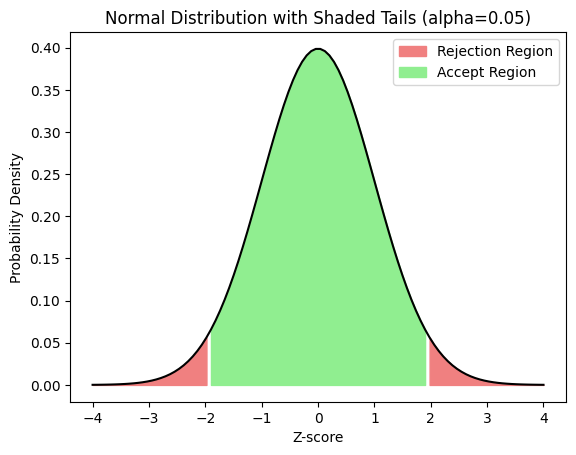

In [ ]:
def plot_normal_with_shaded_tails(alpha=0.05):
  """Plots a normal distribution curve with shaded tails.

  Args:
    alpha: The significance level (e.g., 0.05 for a 95% confidence interval).
  """

  # Create x-axis values
  x = np.linspace(-4, 4, 100)

  # Calculate normal distribution values
  y = stats.norm.pdf(x)

  # Plot the normal distribution curve
  plt.plot(x, y, color = 'k')

  # Shade the tails
  # Calculate the critical values for the tails
  lower_critical = stats.norm.ppf(alpha / 2)
  upper_critical = stats.norm.ppf(1 - alpha / 2)

  # Fill the lower tail
  plt.fill_between(x, y, where=(x < lower_critical), color='lightcoral',
                   label='Rejection Region')

  # Fill the upper tail
  plt.fill_between(x, y, where=(x > upper_critical), color='lightcoral')

  # Fill the middle (Acceptance Region)
  plt.fill_between(x, y, where=(x >= lower_critical) & (x <= upper_critical),
                   color='lightgreen', label='Accept Region')


  # Add labels and title
  plt.xlabel('Z-score')
  plt.ylabel('Probability Density')
  plt.title(f'Normal Distribution with Shaded Tails (alpha={alpha})')
  plt.legend()

  # Show the plot
  plt.show()

# Example usage:
plot_normal_with_shaded_tails(alpha=0.05)

In [ ]:
z_aL = stats.norm.ppf(0.05/2)
z_aU = stats.norm.ppf(1-(0.05/2))
print('Lower 95% confidence level:', "{:.3f}".format(z_aL))
print('Upper 95% confidence level:', "{:.3f}".format(z_aU))

Lower 95% confidence level: -1.960
Upper 95% confidence level: 1.960


For this example, we find the $Z$ statistic to be ~ 8.23, which is larger than the upper bound limit set by the 95% confidence level.

We can calculate the probability of observing the obtained sample data (or more extreme data) if the null hypothesis were true by using the cumulative distribution function:

`p = 2 * (1 - stats.norm.cdf(abs(z_statistic)))`

Note: 2 times the value due to the fact we have two tails in the distribution the extreme event could fall.

This probability is called the [p-value](https://en.wikipedia.org/wiki/P-value). If a p-value is less than the critical value set for testing the null hypothesis ($\alpha = 0.05$), then there is evidence to support rejecting the null hypothesis.

It is common practice to include p-values in hypothesis testing, but it is [easy to come to the wrong conclusions](https://en.wikipedia.org/wiki/Misuse_of_p-values) regarding the significance of a value. Because this is not a stats class (though it probably feels like it right now), we will simply quote wikipeadia and leave it at that:

*The p-value can be taken as the probability of obtaining an effect that is at least as extreme as the observed effect, given that the null hypothesis is true. This should not be confused with the probability that the null hypothesis is true given the observed effect.*

In [ ]:
p = 2 * (1 - stats.norm.cdf(abs(z_statistic)))
print('p-value:', p)

p-value: 2.220446049250313e-16


Therefore, we have evidence to support rejecting the null hypothesis, the samples are highly unlikely to be from the assumed parent distribution.

# Student's t-Distribution and t-test

When dealing with real world sampled data, it is unlikely you will have the parent distribution mean and standard deviation known. This means we cannot appropriately use the $Z$ statistic.

Two examples that we often are interested in:

* Does our sample data differ from an expected mean? (one sample test)
* When we compare two separate sets of data, are the means significantly different? (independent sample test)

Because data sets represent a limited, descrete number of data points, the mean and standard deviations we calculate are not necesarilly that of the true population. So how do we compare our data if the $Z$ statistic is not appropriate?

To answer this question, we can use the [Student's t-test](https://en.wikipedia.org/wiki/Student%27s_t-test). The reason this works is because the Student's t-distribution is similar to a normal distribution, but has fatter tails on either end. As the number of data points (degrees of freedom) that make up the distribution increases, the t-distribution approaches that of a normal distribution.





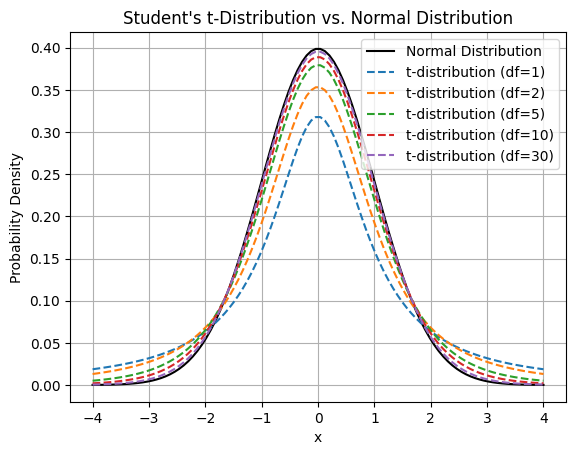

In [ ]:
# Define the x-axis range
x = np.linspace(-4, 4, 100)

# Plot the standard normal distribution
plt.plot(x, stats.norm.pdf(x), color='black', linestyle='-', label='Normal Distribution')

# Plot the t-distributions for different degrees of freedom
for df in [1, 2, 5, 10, 30]:  # Degrees of freedom to plot
    plt.plot(x, stats.t.pdf(x, df), linestyle='--', label=f't-distribution (df={df})')

# Customize the plot
plt.title("Student's t-Distribution vs. Normal Distribution")
plt.xlabel("x")
plt.ylabel("Probability Density")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

If we are comparing a sample to an expected mean (one sample test), the equation for our t-test statistic is:

$$
\begin{align}
t &= \frac{\bar{x}-\mu_0}{\sigma_s/\sqrt{n}} \tag{4} \\
\end{align}
$$

Where:
* $\bar{x}$ is the sample mean
* $\mu_0$ is the expected mean
* $\sigma_s$ is the standard deviation of the sample
* $n$ is the sample size

Note the similarity to our equation for the $Z$ statistic (3).

While we *can* write out the math to do the calculations, it is more common to use the functions in `scipy.stats`:

`t_stat, p_value = stats.ttest_1samp(random_sample, mean)`

The scipy.stats function outputs two values we likely want to know: the t-statistic and the p-value.

However, it is important to know how a value is calculated. Never just trust that a function is doing what you *think* it is doing. If it is unclear how a value is being calculated, check the documentation.

In [ ]:
def t_test1(x_bar, mu_0, sigma_s, n):
    return (x_bar - mu_0) / (sigma_s / math.sqrt(n))

In [ ]:
# Parameters for the normal distribution
mean = 0
stdev = 1
N = 10   # number of samples to draw

# Generate an array of N random samples
random_sample = np.random.normal(mean, stdev, N)

# find mean and stdev of random sample
x_bar = np.mean(random_sample)
sigma_s = np.std(random_sample, ddof=1)

# calculate t_statistic and p-value
t_statistic = t_test1(x_bar, mean, sigma_s, N)
p_value = 2 * (1 - stats.t.cdf(abs(t_statistic), df = N-1))

# compare to results from stats.ttest_1samp
t_statistic_stats, p_value_stats = stats.ttest_1samp(random_sample, mean)

print('t-statistic:', "{:.3f}".format((t_statistic)))
print('scipy.stats t-statistic:', "{:.3f}".format((t_statistic_stats)))
print('----------------')
print('p-value:', "{:.3f}".format(p_value))
print('scipy.stats p-value:', "{:.3f}".format((p_value_stats)))

t-statistic: 0.338
scipy.stats t-statistic: 0.338
----------------
p-value: 0.743
scipy.stats p-value: 0.743


To compare the means of two data sets, we can use the independent samples t-test function in scipy.stats (also known as [Welch's t-test](https://en.wikipedia.org/wiki/Welch%27s_t-test)):

`t_statistic, p_value = stats.ttest_ind(data1, data2, equal_var=False)`

Note that in the above equation, we included the optional input `equal_var=False`. If this statement is not included (or if we write `True`), the function will operate as if the variance of the two input data sets are equal.

Even if the variances are equal, we can still use the Welch's t-test since it just provides a slightly more conservative comparison.

In [ ]:
# Your two data sets
data1 = [1, 2, 3, 4, 5]  # Replace with your actual data
data2 = [2, 4, 6, 8, 3, 5, 1]  # Replace with your actual data

# Perform Welch's t-test
t_statistic, p_value = stats.ttest_ind(data1, data2, equal_var=False)

# Print the results
print('Welchs t-statistic:', "{:.3f}".format((t_statistic)))
print('Welchs p-value:', "{:.3f}".format((p_value)))

Welchs t-statistic: -0.991
Welchs p-value: 0.345


## Class Problem 1

Two groups of students perform an experiment where they time how long it takes for a stone to fall to the ground after dropping from a window.

Are the means from the two sets of data different at the 95% confidence level?

In [ ]:
# measurements from each group:
t_1 = (0.63, 0.58, 0.74, 0.78, 0.70, 0.74)

t_2 = (0.76, 0.62, 0.72, 0.84, 0.65, 0.81)

# Testing for Normality:

Testing for normality is an important step when deciding what statistical tests are appropriate. There are [many different tests for normality](https://en.wikipedia.org/wiki/Normality_test) available to choose from.

Which test to choose depends on the exact situation, but a good choice is the [Shapiro-Wilk](https://en.wikipedia.org/wiki/Shapiro%E2%80%93Wilk_test) test.

The null hypothesis for this test is that there is no difference between the data and a normal distribution. Exactly how this test is done is beyond the scope of this class, but you should know it exists. The test can be included using scipy.stats:

`statistic, p_value = shapiro(data)`

However, something to consider is that as size of the data set approaches "large" numbers, outliers can cause the test to fail. Therfore, it is also a good idea to visually inspect data using histograms and Q-Q plots.

Another commonly used statistical test for normality (or any specific distribution) is the [Komogorov-Smirnov test](https://en.wikipedia.org/wiki/Kolmogorov%E2%80%93Smirnov_test) (also known as KS test). The test can be called upon in python using scipy.stats:

`ks_statistic, ks_p_value = kstest(sample, 'norm')`

The KS test is useful when the number of data points is large (>2000).

# Central Limit Theorem

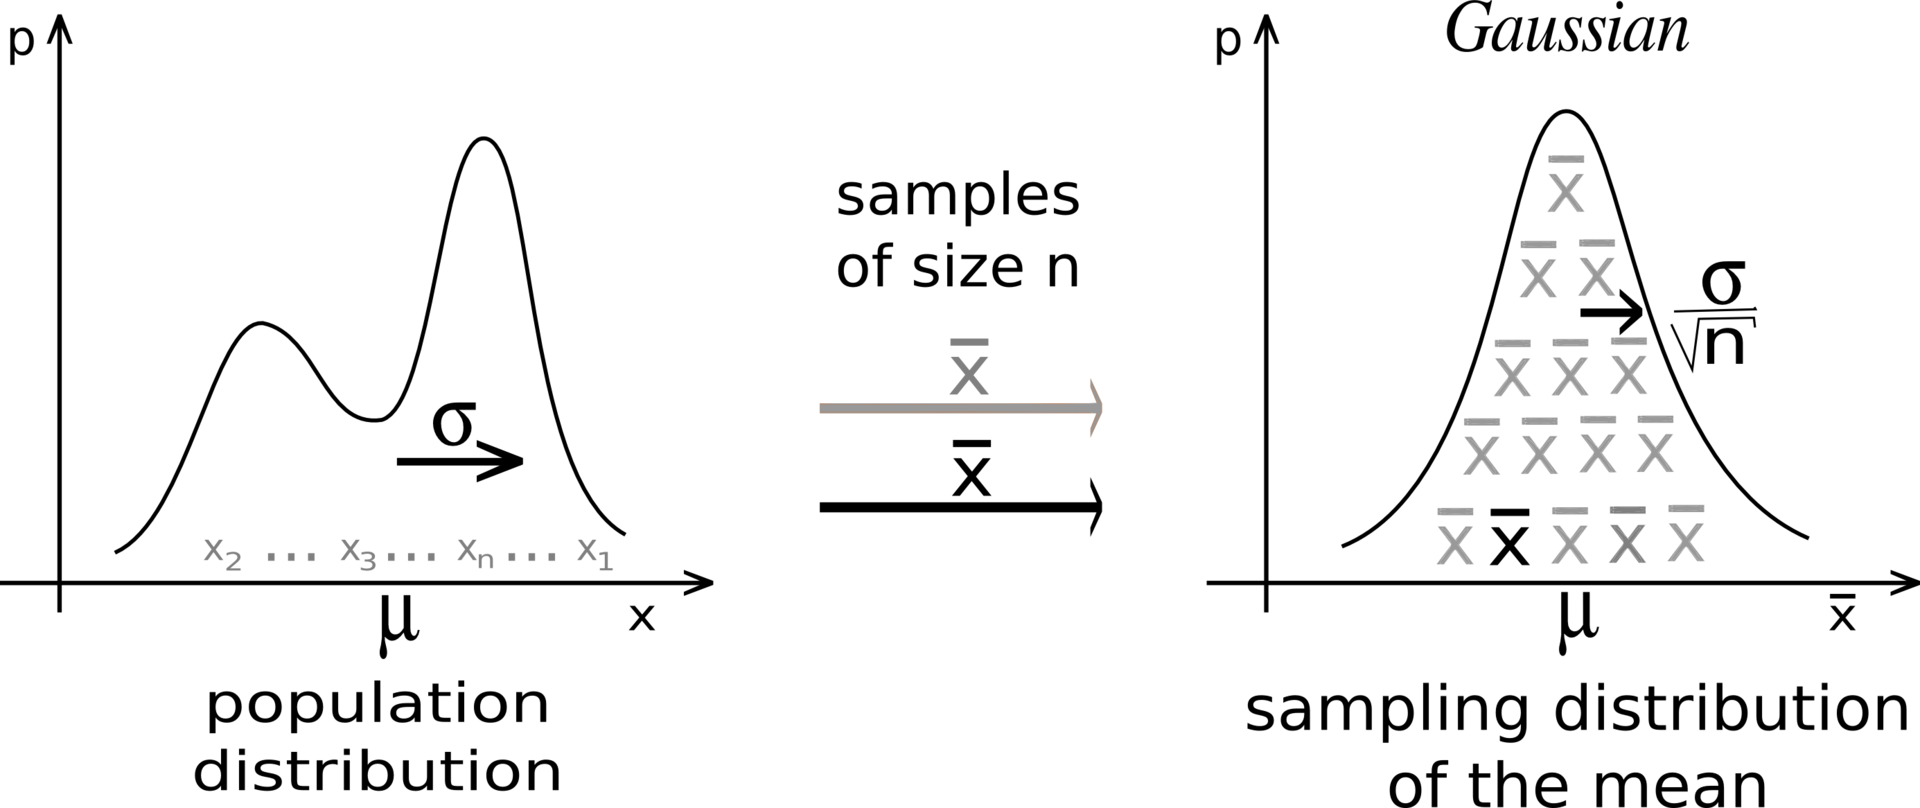

As we sample data in the real world, it is unlikely the parent distribution is perfectly normal. However, our work-around for this problem is the [Central Limit Theorem](https://en.wikipedia.org/wiki/Central_limit_theorem#Remarks).

This theorem tells us that whatever the parent distribution we are sampling from, the mean of means *will* be normally distributed.  

## Class Problem 2

Oceanographers commonly take measurements of the ocean using instruments called [CTD](https://en.wikipedia.org/wiki/CTD_(instrument)), which record conductivity, temperature, and pressure (which is then converted to depth). These instruments record measurements at ~25 times per second, which are then block averaged to find the true "mean" of the of the sample location.

Download the file CTD_Data.xlsx from the CANVAS website (or from GitHub) and upload the file to the notebook using Pandas.

A) Make histogram and Q-Q plots of the temperature (labeled T) and conductivity (labeled C). Do the data appear normal? Can you apply a test to see? If so, what is the result?

B) Block average the readings into groups of 25 (non-overlapping). Make the histogram and Q-Q plots again. Do they appear normal? Test for normalcy.

# Covariance and Correlation

Something we are generally interested in when analyzing data is the "scatter" of the values relative to the mean. The variance ($s^2$) of a variable is given by:


$$
\begin{align}
s^2 &= \frac{1}{N-1} \sum_{i=1}^N (x_i - \bar{x})^2 = \frac{SS}{N-1}\tag{5} \\
\end{align}
$$

Where $SS$ represents the *Sum of Squared deviations* relative to the mean for variable $x$.

We can expand out the squred term:

$$
\begin{align}
s^2 &= \frac{1}{N-1} \sum_{i=1}^N [(x_i - \bar{x})(x_i - \bar{x})] \tag{6} \\
\end{align}
$$

Which seems sort of silly to do until we have two possibly related variables, $x_j$ and $x_k$. Note, the variables should be the same length, which isn't typically a problem if they are measured at the same time like CTD data.

We can now calculate their *covariance*:

$$
\begin{align}
s^2_{jk} &= \frac{1}{N-1} \sum_{i=1}^N [(x_{ij} - \bar{x_j})(x_{ik} - \bar{x_k})] = \frac{SP_{jk}}{N-1} \tag{7} \\
\end{align}
$$

Where $SP_{jk}$ is the sum of products of the deviations of variables $x_j$ and $x_k$. From this, we can see the *variance* is a special case of the *covariance* when $j = k$

The covariance can be positive, negative, or zero.
* If it is *positive*, then $x_j$ tends to be above (or bellow) its mean $\bar{x_j}$ at the same time $x_k$ is above (or bellow) its mean $\bar{x_k}$.
* If it is *negatvie*, then it tends to be that when $x_j$  is above its mean $\bar{x_j}$, then $x_k$ is bellow its mean $\bar{x_k}$ (or vice-versa).
* If it is 0, then there is no correspondance between the variables.

We can now calculate the *correlation coefficience* (also known at the [Pearson Correlation Coefficient](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient)), which is a statistical measure of the linear relationship between two variables. It varies from -1 (perfectly negatively correlated) to +1 (perfectly positively correlated).

$$
\begin{align}
r_{jk} &= \frac{s^2_{jk}}{s_j s_k} = \frac{SP_{jk}}{\sqrt{SS_j SS_k}} \tag{8} \\
\end{align}
$$

The Numpy library has a function we can call to calculate the correlation coefficient for us:

`np.corrcoef(x, y)`

Where `x` and `y` are the two variables we want to compare.

## Class Problem 3

Using data from CTD_Data.xlsx, calculate the covariance correlation coefficient of each varaible (T, S, P, and C) against each other. Are any of the variables positively correlated in this particular dataset? Make scatter plots for each comparison (example: T vs S).